<a href="https://colab.research.google.com/github/gayathrig269/CMPE260_Rfmt_Learning_TicTacToe/blob/main/Part1_MinMaxAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tic-Tac-Toe using Min-Max algorithm

In this Notebook, we introduce an agent and then use the Min-Max algorithm to create a computer player which will be able to play a game of Tic Tac Toe.

The Min-Max player will always play the best possible move in a given situation. This player will give us a good benchmark to compare the other players against.

#What is Min-Max Agorithm ?

Minimax (saddle point) is a decision rule used in artificial intelligence, decision theory, game theory, statistics, and philosophy for minimizing the possible loss for a worst case (maximum loss) scenario. When dealing with gains, it is referred to as "maximin"—to maximize the minimum gain. Originally formulated for n-player zero-sum game theory, covering both the cases where players take alternate moves and those where they make simultaneous moves, it has also been extended to more complex games and to general decision-making in the presence of uncertainty. 

Ref : https://en.wikipedia.org/wiki/Minimax

#Min-Max Player to play Tic-Tac-Toe

Given a board state, we find the best move by simulating all possible continuations from this position and chose the one that is best for our agent. The one best for us is the one with the best outcome if we assume the following points:

1.We always make the move that is best for us (Maximizes the game value for us)


2.Our opponent always makes the move that is best for them (and thus worst for us — Minimizing the game value for us).

#The Min-Max Player Code

Our code contains 2 player classes which implement the Min Max algorithm for playing Tic Tac Toe:

1. MinMaxAgent.py
    
Plays Tic Tac Toe using the Min Max Algorithm in a deterministic way. i.e. if there is more than 1 move with equal best scores in a given position, this player will always chose the same move.

2. RndMinMaxAgent.py: 

Plays Tic Tac Toe using the Min Max Algorithm in a non-deterministic way. I.e. if there is more than 1 move with equal best scores in a given position this player will each time randomly chose between them.

In order to make things a bit more efficient, the players will also store the value for a given board position in an internal cache. This means, that they only have to compute the possible continuations from each position once. It even makes this first computation more efficient, as often different move combinations will produce the same board positions, which, with the cached result, we don’t have to evaluate again.

In [ ]:
#Mounting the google drive contents of TIC-TAC_TOE code 
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/tic_tac_toe_master/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My\ Drive/tic_tac_toe_master/

/content/gdrive/My Drive/tic_tac_toe_master


#Defining battle function 

In [ ]:
from Player import Player

def battle(player1: Player, player2: Player, num_games: int = 100000):
    board = Board()
    draw_count = 0
    cross_count = 0
    naught_count = 0
    for _ in range(num_games):
        result = play_game(board, player1, player2)
        if result == GameResult.CROSS_WIN:
            cross_count += 1
        elif result == GameResult.NAUGHT_WIN:
            naught_count += 1
        else:
            draw_count += 1

    print("After {} game we have draws: {}, Player 1 wins: {}, and Player 2 wins: {}.".format(num_games, draw_count,
                                                                                         cross_count, naught_count))

    print("Which gives percentages of draws: {:.2%}, Player 1 wins: {:.2%}, and Player 2 wins:  {:.2%}".format(
        draw_count / num_games, cross_count / num_games, naught_count / num_games))

#Statistics after every battle

First we define a small utility function which we call battle to repeatedly pit 2 players against each other for a number of games. After the "battle" has finished, the function will return statistics about who won how often.

In [ ]:
from Player import Player

def battle(player1: Player, player2: Player, num_games: int = 100000):
    board = Board()
    draw_count = 0
    cross_count = 0
    naught_count = 0
    for _ in range(num_games):
        result = play_game(board, player1, player2)
        if result == GameResult.CROSS_WIN:
            cross_count += 1
        elif result == GameResult.NAUGHT_WIN:
            naught_count += 1
        else:
            draw_count += 1

    print("After {} game we have draws: {}, Player 1 wins: {}, and Player 2 wins: {}.".format(num_games, draw_count,
                                                                                         cross_count, naught_count))

    print("Which gives percentages of draws: {:.2%}, Player 1 wins: {:.2%}, and Player 2 wins:  {:.2%}".format(
        draw_count / num_games, cross_count / num_games, naught_count / num_games))

Let's use this function and to start of with we pit the MinMaxAgent against the RandomPlayer:

In [ ]:
from MinMaxAgent import MinMaxAgent

battle(MinMaxAgent(), RandomPlayer())

After 100000 game we have draws: 517, Player 1 wins: 99483, and Player 2 wins: 0.
Which gives percentages of draws: 0.52%, Player 1 wins: 99.48%, and Player 2 wins:  0.00%


And now, with the Random player going first:

In [ ]:
battle(RandomPlayer(), MinMaxAgent())

After 100000 game we have draws: 19319, Player 1 wins: 0, and Player 2 wins: 80681.
Which gives percentages of draws: 19.32%, Player 1 wins: 0.00%, and Player 2 wins:  80.68%


Next, the 2 MinMax players against each other:

In [ ]:
from RndMinMaxAgent import RndMinMaxAgent

battle(MinMaxAgent(), RndMinMaxAgent())

After 100000 game we have draws: 100000, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%


Observation:

As expected, we got 100% draws.

1.Min-Max Player vs RandomPlayer 

In [ ]:
battle(MinMaxAgent(),RandomPlayer(),50000)

After 50000 game we have draws: 236, Player 1 wins: 49764, and Player 2 wins: 0.
Which gives percentages of draws: 0.47%, Player 1 wins: 99.53%, and Player 2 wins:  0.00%


Min-Max vs Random player (Min-Max plays second)

In [ ]:
battle(RandomPlayer(), MinMaxAgent(),50000) #50000 is the number of games

After 50000 game we have draws: 9651, Player 1 wins: 0, and Player 2 wins: 40349.
Which gives percentages of draws: 19.30%, Player 1 wins: 0.00%, and Player 2 wins:  80.70%


2.Min-Max Player vs Non-determininstic Min-Max player

In [ ]:
from RndMinMaxAgent import RndMinMaxAgent

battle(MinMaxAgent(), RndMinMaxAgent(),50000)

After 50000 game we have draws: 50000, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%


Min-Max Player vs Non-determininstic Min-Max player

Min-Max Player plays second !

In [ ]:
from RndMinMaxAgent import RndMinMaxAgent

battle(RndMinMaxAgent(),MinMaxAgent(),50000)

After 50000 game we have draws: 50000, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%


Observation:

As expected, when MinMax player can't outdo itself. It draws everytime whether it plays first or second.

#Plotting graphs

Defining **eval_players** function : 


Helps in plotting a graph to analyze two players fighting a battle

In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import util

def eval_players(p1 : Player, p2 : Player, num_battles : int, games_per_battle = 100, loc='best'):
    p1_wins = []
    p2_wins = []
    draws = []
    count = []    

    for i in range(num_battles):
        p1win, p2win, draw = battle(p1, p2, games_per_battle, True)
        p1_wins.append(p1win*100.0/games_per_battle)
        p2_wins.append(p2win*100.0/games_per_battle)
        draws.append(draw*100.0/games_per_battle)
        count.append(i*games_per_battle)
        p1_wins.append(p1win*100.0/games_per_battle)
        p2_wins.append(p2win*100.0/games_per_battle)
        draws.append(draw*100.0/games_per_battle)
        count.append((i+1)*games_per_battle)

    plt.ylabel('Game outcomes in %')
    plt.xlabel('Game number')

    plt.plot(count, draws, 'r-', label='Draw')
    plt.plot(count, p1_wins, 'g-', label='Player 1 wins')
    plt.plot(count, p2_wins, 'b-', label='Player 2 wins')
    plt.legend(loc=loc, shadow=True, fancybox=True, framealpha =0.7)

Testing MinMax Agent vs RandomMinMax agent

In [ ]:
player1 = MinMaxAgent()
player2 = RndMinMaxAgent()
eval_players(player1,player2,100)
#100 is the no. of battles
#1 battle = 100 games

In [ ]:
player1 = RndMinMaxAgent()
player2 = MinMaxAgent()
eval_players(player1, player2,100)
#100 is the no. of battles
#1 battle = 100 games

Observation: 

As seen in the battle function statistics, although they play for 10000 games, they neither win/lose.It's a draw 100% of the time.

2.Min-Max Player vs Random Player

In [ ]:
player1 = MinMaxAgent()
player2 = RandomPlayer()
eval_players(player1, player2,5)
#5 is the number of battles
#total 500 games

In [ ]:
player1 = RandomPlayer()
player2 = MinMaxAgent()
eval_players(player1, player2,5)
#5 is the number of battles
#total 500 games

Observation: 

Min-Max agent wins the game, 99% of the time when it starts first, and when playing second, it wins 80% of the games, but draws at random places of games.

#Conclusion

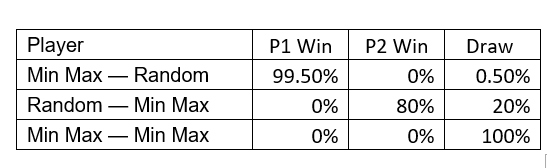

From the above table, it can be concluded as, in order to be considered as  playing better than a pure random player, a player should achieve significantly more than 20% draws against a Min-Max player when going first and significantly more than 1% draws when going second.